0.0 0.1 0.1 0.0
 Prob in 10 = 0.1
 Prob in 11 = 0.1
 Prob in 12 = 0.1
 Prob in 13 = 0.1
 Prob in 14 = 0.1
 Prob in 15 = 0.1
 Prob in 16 = 0.1
 Prob in 17 = 0.1
 Prob in 18 = 0.1
 Prob in 19 = 0.1
0.0 0.5 1.0 1.0
Prob che il valore della mia variabile assuma un valore <= 15 =  0.5
10.0 15.0 20.0
 quale è la prob che la variabile assume 


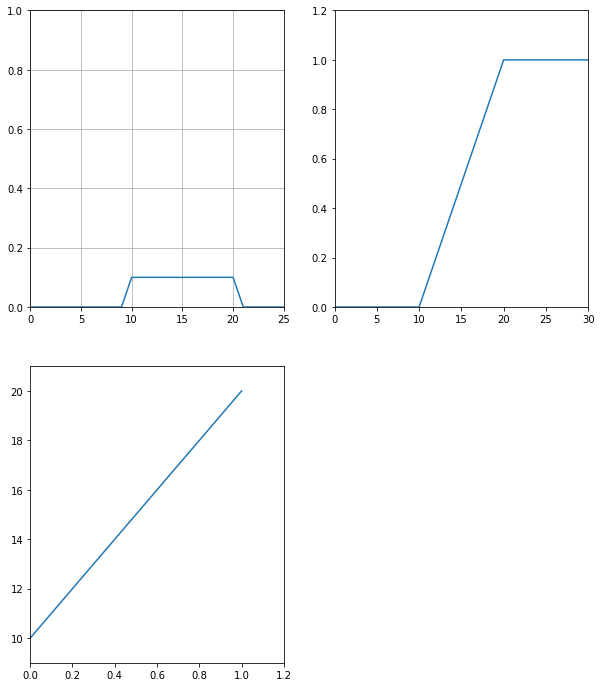

In [13]:
from scipy.stats import uniform
u = uniform(loc=10,scale=10)#low +range [10,20]
print(u)



import numpy as np 
import matplotlib.pyplot as plt

print(u.pdf(5),u.pdf(15),u.pdf(20),u.pdf(21))

for i in np.arange(10,20):
    print(" Prob in {} =".format(i),u.pdf(i))

plt.figure(figsize=(10,12))
plt.subplot(221)
x=np.arange(0,100)
y=u.pdf(x)

plt.plot(x,y)
plt.grid()
plt.ylim(0,1)
plt.xlim(0,25)



print(u.cdf(5), u.cdf(15), u.cdf(20), u.cdf(21))
plt.subplot(222)
x=np.arange(0,100)
y=u.cdf(x)

plt.plot(x,y)
plt.ylim(0,1.2)
plt.xlim(0,30)



print("Prob che il valore della mia variabile assuma un valore <= 15 = ",u.cdf(15))


print(u.ppf(0), u.ppf(0.5), u.ppf(1)) 
plt.subplot(223)
x=np.arange(0,150)/100
y=u.ppf(x)
plt.xlim(0,1.2)
plt.ylim(9,21)
plt.plot(x,y)
print(" quale è la prob che la variabile assume ")





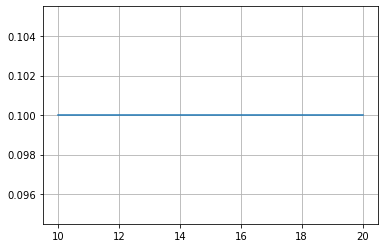

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a=u.ppf(0)
b=u.ppf(1)

x=np.linspace(a,b,100)

plt.plot(x,u.pdf(x))
plt.grid()

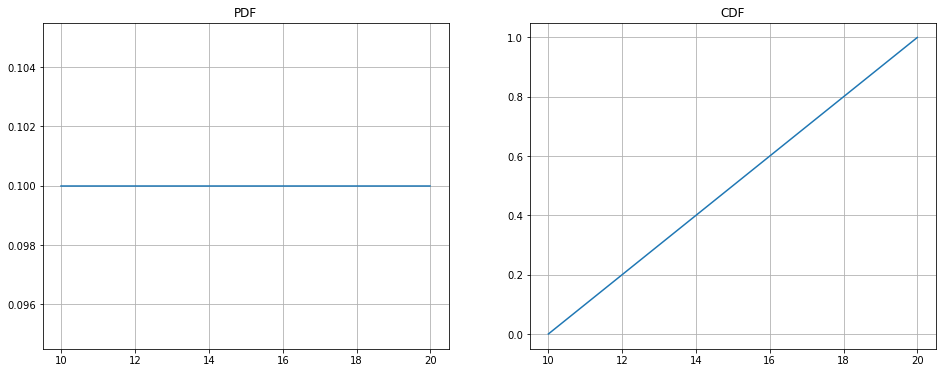

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('PDF')
plt.plot(x,u.pdf(x))
plt.grid()
plt.subplot(122)
plt.plot(x,u.cdf(x))
plt.title('CDF')
plt.grid()
plt.show()

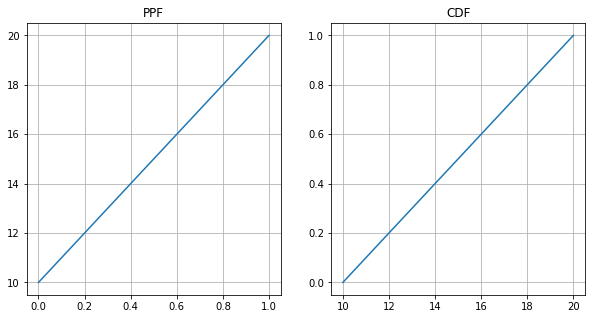

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(u.cdf(x),u.ppf(u.cdf(x)))
plt.title('PPF')
plt.grid()
plt.subplot(122)
plt.plot(x,u.cdf(x))
plt.title('CDF')
plt.grid()
plt.show()

In [18]:
from scipy.stats import binom

bn1 = binom(n=20, p=0.1)
bn2 = binom(n=20, p=0.2)
bn3 = binom(n=20, p=0.5)

In [22]:
bn1.pmf(10)
def plot_dist(dist, label=None, cdf=False):
    a = dist.ppf(0) 
    b = dist.ppf(1)
    
    #usiamo arange invece di linspace, perché la distribuzione è discreta
    x = np.arange(a,b)
    
    if cdf:
        plt.plot(x,dist.cdf(x), label=label)
    else:
        plt.plot(x,dist.pmf(x), label=label)

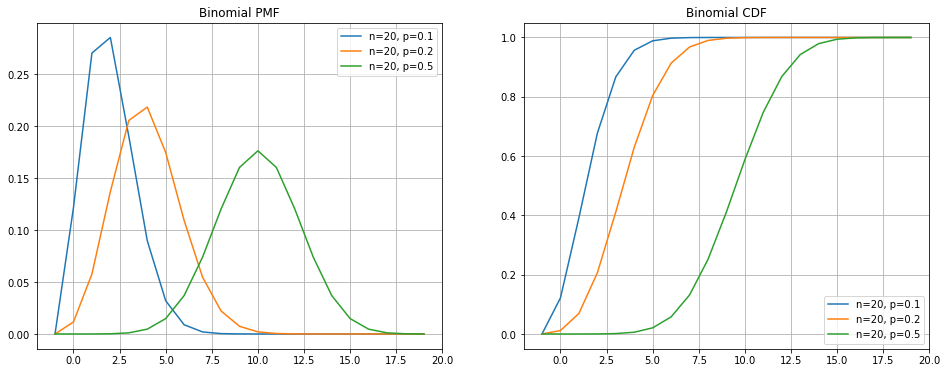

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Binomial PMF')
plot_dist(bn1,'n=20, p=0.1')
plot_dist(bn2,'n=20, p=0.2')
plot_dist(bn3,'n=20, p=0.5')
plt.grid()
plt.legend()


plt.subplot(1,2,2)
plt.title('Binomial CDF')
plot_dist(bn1,'n=20, p=0.1', cdf=True)
plot_dist(bn2,'n=20, p=0.2', cdf=True)
plot_dist(bn3,'n=20, p=0.5', cdf=True)
plt.grid()
plt.legend()
plt.show()


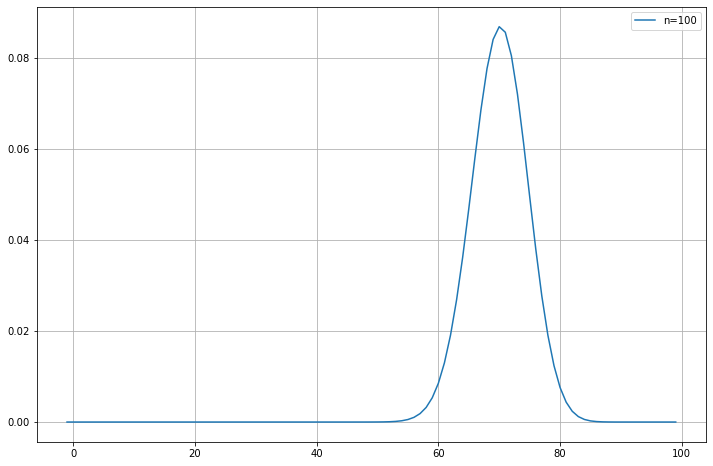

In [25]:
#generiamo 4 distribuzioni binomiali
ns = [100]
binoms=[binom(n=i, p=0.7) for i in ns]

plt.figure(figsize=(12,8))
for b,n in zip(binoms,ns):
    plot_dist(b,'n='+str(n))
plt.legend()
plt.grid()
plt.show()

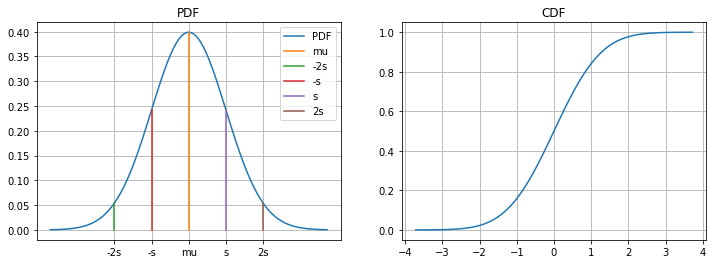

In [27]:
from scipy.stats import norm
mu=0
s=1
g = norm(mu,s)


#dato che gli estremi di una distribuzione Gaussiana
#sono -inf e +inf, individuiamo un intervallo che contenga il 99.98% della densità
a = g.ppf(0.0001) ## alla sinistra c'è il 0.001% dei valori
b = g.ppf(0.9999) ## alla sinistra c'è il 99% dei valori


x = np.linspace(a,b,100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('PDF')
plt.plot(x,g.pdf(x),label='PDF')
plt.plot([mu,mu],[0,g.pdf(mu)], label='mu')
plt.plot([-2*s,-2*s],[0,g.pdf(-2*s)], label='-2s')
plt.plot([-s,-s],[0,g.pdf(-s)], label='-s')
plt.plot([s,s],[0,g.pdf(s)], label='s')
plt.plot([2*s,2*s],[0,g.pdf(2*s)], label='2s')
plt.xticks([-2*s,-s,mu,s,2*s],['-2s','-s','mu','s','2s'])
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('CDF')
plt.plot(x,g.cdf(x))
plt.grid()
plt.show()


In [29]:
import pandas as pd
np.random.seed(1234)
#generiamo un campione di 70 elementi che segue una distribuzione normale
sample = pd.Series(np.random.normal(0,1,70))

print("Stima distorta della varianza",sample.var(ddof=0))
print("Stima non distorta della varianza",sample.var())

Stima distorta della varianza 0.9767042085310298
Stima non distorta della varianza 0.9908593419880013


(-1.0536791222373854, 4.991786318662554)


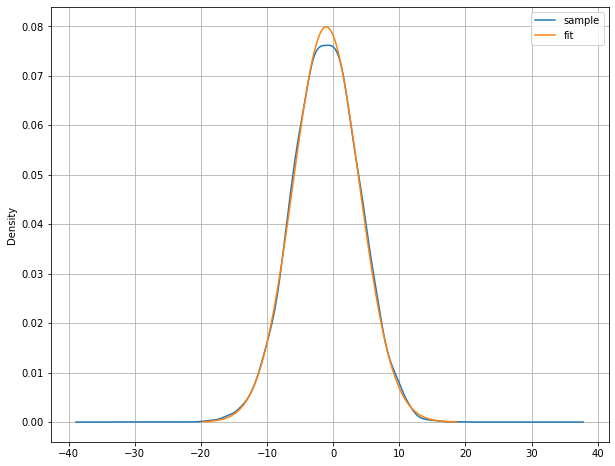

In [32]:
np.random.seed(12345)
#generiamo un campione distribuito secondo
#una Gaussiana di media -1 e deviazione standard 5
sample=np.random.normal(-1,5,10000)

print(norm.fit(sample))


plt.figure(figsize=(10,8))
pd.Series(sample).plot.density()
g=norm(*norm.fit(sample))
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['sample','fit'])
plt.show()


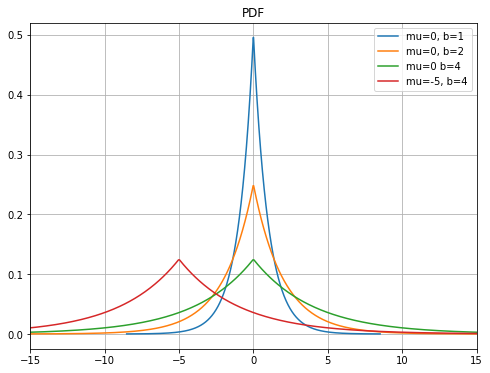

In [33]:
from scipy.stats import laplace

def plot_pdf(ls, labels):
    plt.figure(figsize=(8,6))
    for l,label in zip(ls,labels):
        a = l.ppf(0.0001) 
        b = l.ppf(0.9999)

        x = np.linspace(a,b,1000)

        plt.title('PDF')
        plt.plot(x,l.pdf(x), label=label)
    plt.legend()
    plt.grid()
        
l1 = laplace(0,1)
l2 = laplace(0,2)
l3 = laplace(0,4)
l4 = laplace(-5,4)

plot_pdf([l1,l2,l3,l4],['mu=0, b=1','mu=0, b=2', 'mu=0 b=4', 'mu=-5, b=4'])
plt.xlim([-15,15])
plt.show()

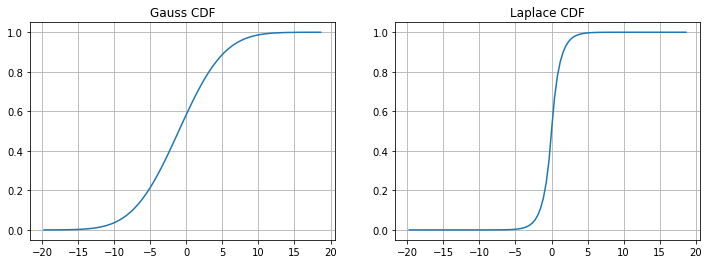

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Gauss CDF')
plt.plot(x,g.cdf(x))
plt.grid()
plt.subplot(1,2,2)
plt.title('Laplace CDF')
plt.plot(x,l1.cdf(x))
plt.grid()
plt.show()

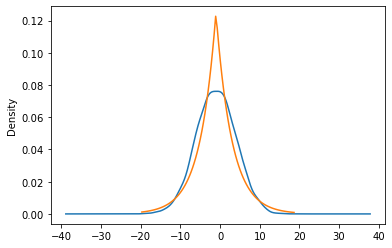

In [35]:
l=laplace(*laplace.fit(sample))
pd.Series(sample).plot.density()
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,l.pdf(x))
plt.show()

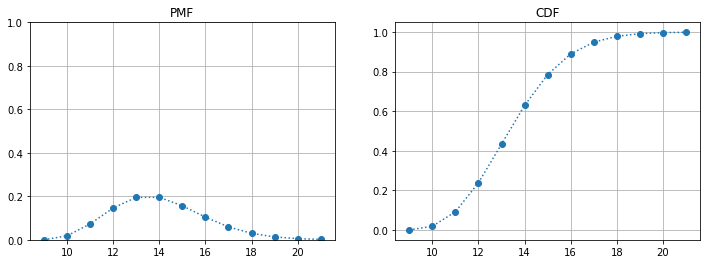

In [37]:
from scipy.stats import poisson
#distribuzione di Poisson con lambda = 4 e n=10
p = poisson(4,10)
#la distribuzione di Poisson è definita solo su numeri naturali,
#quindi usiamo "arange" invece di "linspace"
x = np.arange(p.ppf(0.001)-1,p.ppf(0.999)+1)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('PMF')
plt.plot(x,p.pmf(x),':o')
plt.ylim([0,1])
plt.grid()

plt.subplot(122)
plt.title('CDF')
plt.plot(x,p.cdf(x),':o')
plt.grid()
plt.show()


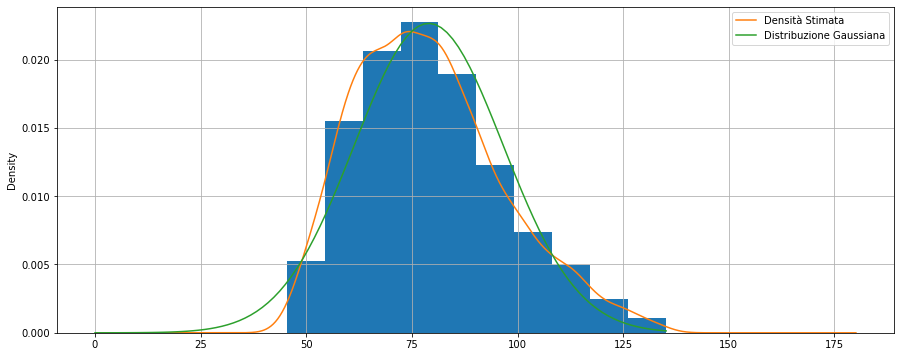

In [39]:
import pandas as pd
data=pd.read_csv('height_weight.csv')
data.head()


mu = data['weight'].mean()
sigma = data['weight'].std()

g = norm(mu,sigma)
x=np.linspace(0,data['weight'].max(),100)

plt.figure(figsize=(15,6))
data['weight'].plot.hist(20,density=True)
data['weight'].plot.density()
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])
plt.show()



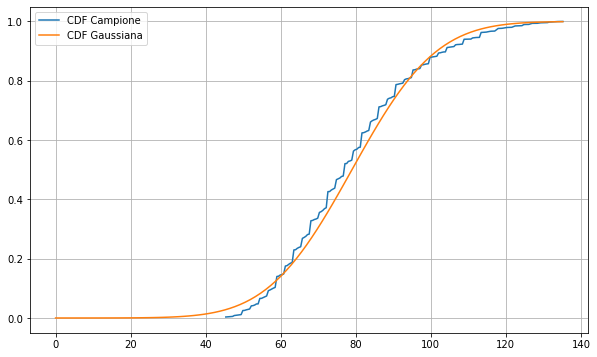

In [40]:
cdf_weight = data['weight'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(10,6))
cdf_weight.plot()
plt.plot(x,g.cdf(x))
plt.grid()
plt.legend(['CDF Campione','CDF Gaussiana'])
plt.show()

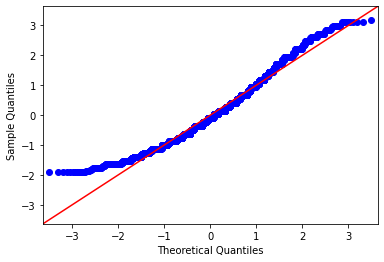

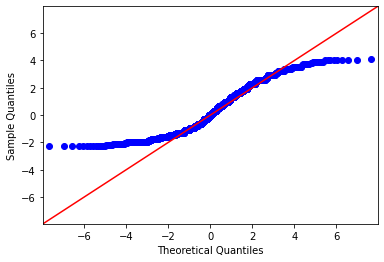

In [42]:
from statsmodels.graphics.gofplots import qqplot

#fit=True indica che bisogna fare fit della distribuzione sui dati
#e che bisogna inoltre standardizzare i dati
#line='45' indica di plottare una linea a 45 gradi per riferimento
qqplot(data['weight'], fit=True, line='45')
plt.show()

from scipy.stats import laplace

qqplot(data['weight'], fit=True, line='45', dist=laplace)
plt.show()


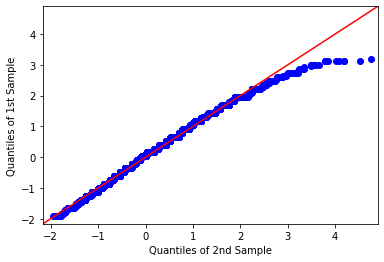

In [43]:
from scipy.stats import zscore
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(zscore(data['weight']), zscore(data['BMI']), line='45')
plt.show()

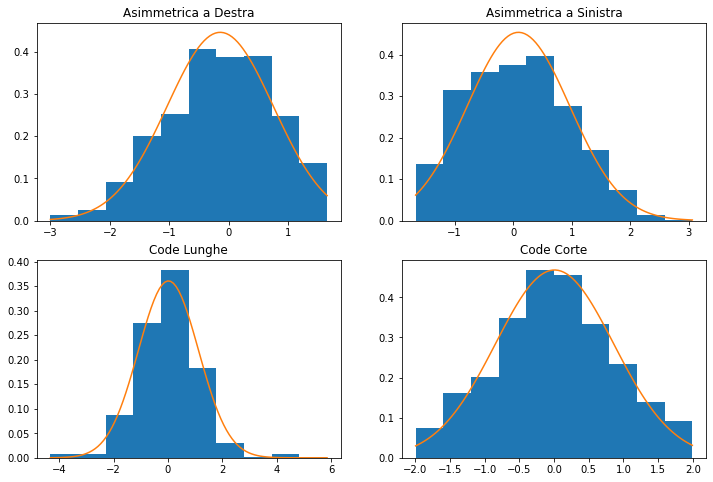

In [44]:
asimmetrica_sinistra = np.sort(np.random.normal(0,1,1000))[50:] #genero una distribuzione simmetrica e "la taglio"
asimmetrica_destra = np.sort(np.random.normal(0,1,1000))[:950] #genero una distribuzione simmetrica e "la taglio"

code_lunghe = np.random.normal(0,1,1000)
code_lunghe[np.abs(code_lunghe)>2.5]*=1.5 #"allunghiamo" le code
code_corte = np.random.normal(0,1,1000)
code_corte[np.abs(code_corte)>2]*=0.1#"accorciamo" le code

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.hist(asimmetrica_destra,density=True)
plt.title('Asimmetrica a Destra')
g = norm(asimmetrica_destra.mean(),asimmetrica_destra.std())
x=np.linspace(np.min(asimmetrica_destra),np.max(asimmetrica_destra),100)
plt.plot(x,g.pdf(x))

plt.subplot(222)
plt.hist(asimmetrica_sinistra, density=True)
plt.title('Asimmetrica a Sinistra')
g = norm(asimmetrica_sinistra.mean(),asimmetrica_sinistra.std())
x=np.linspace(np.min(asimmetrica_sinistra),np.max(asimmetrica_sinistra),100)
plt.plot(x,g.pdf(x))

plt.subplot(223)
plt.hist(code_lunghe, density=True)
g = norm(code_lunghe.mean(),code_lunghe.std())
x=np.linspace(np.min(code_lunghe),np.max(code_lunghe),100)
plt.plot(x,g.pdf(x))
plt.title('Code Lunghe')
#plt.xlim([-8,8])

plt.subplot(224)
plt.hist(code_corte, density=True)
#plt.xlim([-5,5])
g = norm(code_corte.mean(),code_corte.std())
x=np.linspace(np.min(code_corte),np.max(code_corte),100)
plt.plot(x,g.pdf(x))
plt.title('Code Corte')

plt.show()


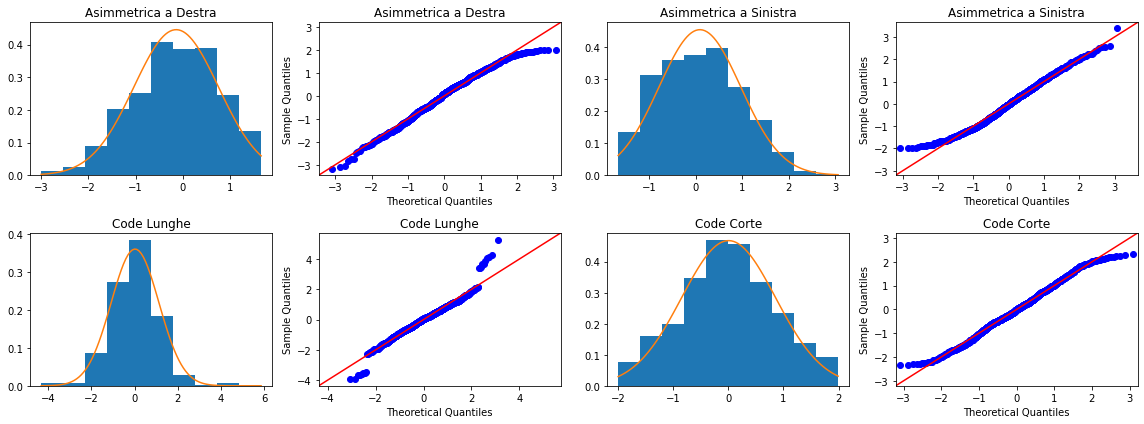

In [45]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.hist(asimmetrica_destra, density=True)
g = norm(asimmetrica_destra.mean(),asimmetrica_destra.std())
x=np.linspace(np.min(asimmetrica_destra),np.max(asimmetrica_destra),100)
plt.plot(x,g.pdf(x))
plt.title('Asimmetrica a Destra')

ax=plt.subplot(242)
qqplot(asimmetrica_destra, fit=True, line ='45', ax=ax)
plt.title('Asimmetrica a Destra')

plt.subplot(243)
plt.hist(asimmetrica_sinistra, density=True)
g = norm(asimmetrica_sinistra.mean(),asimmetrica_sinistra.std())
x=np.linspace(np.min(asimmetrica_sinistra),np.max(asimmetrica_sinistra),100)
plt.plot(x,g.pdf(x))
plt.title('Asimmetrica a Sinistra')

ax=plt.subplot(244)
qqplot(asimmetrica_sinistra, fit=True, line ='45', ax=ax)
plt.title('Asimmetrica a Sinistra')

plt.subplot(245)
plt.hist(code_lunghe, density=True)
g = norm(code_lunghe.mean(),code_lunghe.std())
x=np.linspace(np.min(code_lunghe),np.max(code_lunghe),100)
plt.plot(x,g.pdf(x))
plt.title('Code Lunghe')

ax=plt.subplot(246)
qqplot(code_lunghe, fit=True, line ='45', ax=ax)
plt.title('Code Lunghe')

plt.subplot(247)
plt.hist(code_corte, density=True)
g = norm(code_corte.mean(),code_corte.std())
x=np.linspace(np.min(code_corte),np.max(code_corte),100)
plt.plot(x,g.pdf(x))
plt.title('Code Corte')

ax=plt.subplot(248)
qqplot(code_corte, fit=True, line ='45', ax=ax)
plt.title('Code Corte')

plt.tight_layout()
plt.show()

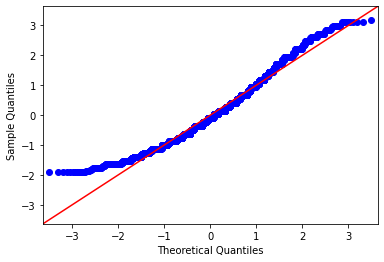

In [46]:
qqplot(data['weight'], fit=True, line='45')
plt.show()

In [47]:
from scipy.stats import chisquare
np.random.seed(123)
#generiamo un campione casuale distribuito secondo una distribuzione normale
sample = np.random.normal(0,1,1000)

#costruiamo una distribuzione teorica normale di parametri noti
g = norm(0,1)

#per calcolare le frequenze, dobbiamo suddividere i dati in bin
#generiamo 11 bordi (per 10 bin) che spaziano uniformemente
#tra il valore che contiene l'1% della gaussiana e quello che
#contiene il 99% della gaussiana
edges = np.linspace(g.ppf(0.01),g.ppf(0.99),11)

#calcoliamo le probabilità cumulative che si hanno in corrispondenza degli edge scelti
cumulative_probs = g.cdf(edges)
#calcoliamo dunque le probabilità di ogni bin sottraendo la probabilità
#cumulativa i-esima alla (i+1)-esima. Questo si ottiene mediante np.diff
probs = np.diff(cumulative_probs)

#otteniamo le frequenze teoriche moltiplicando le probabilità per il numero di elementi
frequenze_teoriche = probs*len(sample)

#calcoliamo l'istogramma con gli stessi edges
#per ottenere le frequenze empiriche mediante np.histogram
frequenze_empiriche, _ = np.histogram(sample,edges)

#controlliamo che le tutte le frequenze siano almeno pari a 5
#se la condizione non è verificata, il codice terminerà con un errore
assert(frequenze_teoriche.min()>=5)
assert(frequenze_empiriche.min()>=5)

print("Statistica %0.4f, p-value: %0.4f"%chisquare(frequenze_empiriche,frequenze_teoriche))
print("(Frequenze Osservate, Frequenze Teoriche):")
list(zip(frequenze_empiriche,frequenze_teoriche))

Statistica 9.0102, p-value: 0.4363
(Frequenze Osservate, Frequenze Teoriche):


[(26, 21.366560126703543),
 (52, 50.019491099561975),
 (99, 94.65995066463478),
 (134, 144.8232081463074),
 (198, 179.1307899627923),
 (178, 179.13078996279242),
 (122, 144.82320814630734),
 (100, 94.65995066463474),
 (55, 50.01949109956194),
 (18, 21.366560126703572)]

In [48]:
np.random.seed(123)
#genearimo un campione che segue una distribuzione Gaussiana
#di media -2 e deviazione standard 3.2
sample = np.random.normal(-5,10,1000)

#effetuiamo il fit della distribuzione ai dati
parameters = norm.fit(sample)
g = norm(*parameters)

#possiamo ottenere il numero di parametri della distribuzione
#calcolando il numero di elementi di parameters
num_par = len(parameters)

edges = np.linspace(g.ppf(0.01),g.ppf(0.99),11)

cumulative_probs = g.cdf(edges)
probs = np.diff(cumulative_probs)

frequenze_teoriche = probs*len(sample)

frequenze_empiriche, _ = np.histogram(sample,edges)

assert(frequenze_teoriche.min()>=5)
assert(frequenze_empiriche.min()>=5)

#ricordiamoci di specificare ddof=num_par
print("Statistica %0.4f, p-value: %0.4f"%chisquare(frequenze_empiriche,frequenze_teoriche,ddof=num_par))
print("(Frequenze Osservate, Frequenze Teoriche):")
list(zip(frequenze_empiriche,frequenze_teoriche))

Statistica 10.8376, p-value: 0.1459
(Frequenze Osservate, Frequenze Teoriche):


[(20, 21.366560126703543),
 (47, 50.01949109956192),
 (104, 94.65995066463483),
 (130, 144.8232081463074),
 (188, 179.1307899627923),
 (192, 179.1307899627923),
 (119, 144.82320814630745),
 (106, 94.65995066463483),
 (56, 50.01949109956183),
 (20, 21.366560126703572)]